In [55]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets

##Seaborn for fancy plots. 
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis

Fuel Consumption

In [56]:
import stats_can
eco_vec_map = {'Canada Total Passengers':'v11743',
               'Canada Total Hours Flown':'v11747',
               'Canada Total Turbo Fuel Consumed':'v11748',
               'Canada Total operating revenues':'v11749',
               'Air Canada Turbo Fuel Consumed':'v54055428',
               'Air Canada Hours Flown':'v54055427',
               'Air Canada Passengers':'v54055422',
               'West Jet Turbo Fuel Consumed':'v54055448',
               'West Jet Hours Flown':'v54055447',
               'West Jet Passengers':'v54055442'}

vectors = list(eco_vec_map.values())
df = stats_can.sc.vectors_to_df(vectors, periods = 36)

inv_map = {v: k for k, v in eco_vec_map.items()}
df.columns = df.columns.to_series().map(inv_map)
df.index.names = ['Date']

df

,Canada Total Passengers,Canada Total Hours Flown,Canada Total Turbo Fuel Consumed,Canada Total operating revenues,Air Canada Passengers,Air Canada Hours Flown,Air Canada Turbo Fuel Consumed,West Jet Passengers,West Jet Hours Flown,West Jet Turbo Fuel Consumed
Date,,,,,,,,,,
2013-02-01,NaN,NaN,NaN,NaN,1848.0,64.0,262917.0,1424.0,33.0,89868.0
2013-03-01,NaN,NaN,NaN,NaN,2202.0,72.0,298298.0,1612.0,38.0,101717.0
2013-04-01,NaN,NaN,NaN,NaN,1990.0,64.0,277790.0,1512.0,36.0,95881.0
2013-05-01,NaN,NaN,NaN,NaN,1982.0,67.0,295303.0,1509.0,35.0,91281.0
2013-06-01,NaN,NaN,NaN,NaN,2101.0,71.0,310159.0,1473.0,35.0,91502.0
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,6849.0,176.0,613734.0,2429620.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,5984.0,157.0,554380.0,2050054.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,5986.0,155.0,536507.0,1868326.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.describe()

,Canada Total Passengers,Canada Total Hours Flown,Canada Total Turbo Fuel Consumed,Canada Total operating revenues,Air Canada Passengers,Air Canada Hours Flown,Air Canada Turbo Fuel Consumed,West Jet Passengers,West Jet Hours Flown,West Jet Turbo Fuel Consumed
count,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,3043.444444,89.055556,318709.805556,1.008465e+06,2176.333333,68.333333,311497.250000,1630.500000,39.555556,101620.694444
std,2388.551617,59.573218,191919.031523,7.425916e+05,296.504975,7.167386,35854.233632,135.755347,3.417973,8031.858062
min,213.000000,13.000000,72362.000000,1.808850e+05,1618.000000,55.000000,247412.000000,1424.000000,33.000000,88027.000000
25%,832.250000,35.750000,143112.000000,3.270440e+05,1981.250000,64.000000,288186.000000,1536.500000,38.000000,95911.750000
50%,2834.500000,89.500000,309802.500000,8.668405e+05,2154.000000,67.500000,306944.500000,1614.000000,39.500000,101530.000000
75%,5340.500000,146.250000,493948.250000,1.616127e+06,2296.250000,72.000000,326088.750000,1689.000000,41.250000,106717.000000
max,7092.000000,199.000000,695002.000000,2.429620e+06,2961.000000,86.000000,398173.000000,1980.000000,48.000000,120514.000000


In [58]:
df.isnull().sum()

Canada Total Passengers             36
Canada Total Hours Flown            36
Canada Total Turbo Fuel Consumed    36
Canada Total operating revenues     36
Air Canada Passengers               36
Air Canada Hours Flown              36
Air Canada Turbo Fuel Consumed      36
West Jet Passengers                 36
West Jet Hours Flown                36
West Jet Turbo Fuel Consumed        36
dtype: int64

<AxesSubplot: ylabel='Count'>

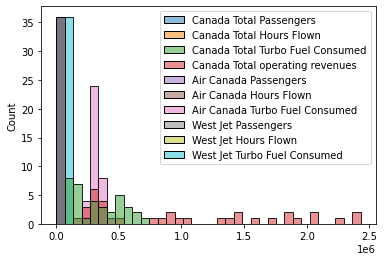

In [59]:
sns.histplot(df)

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>]],
      dtype=object)

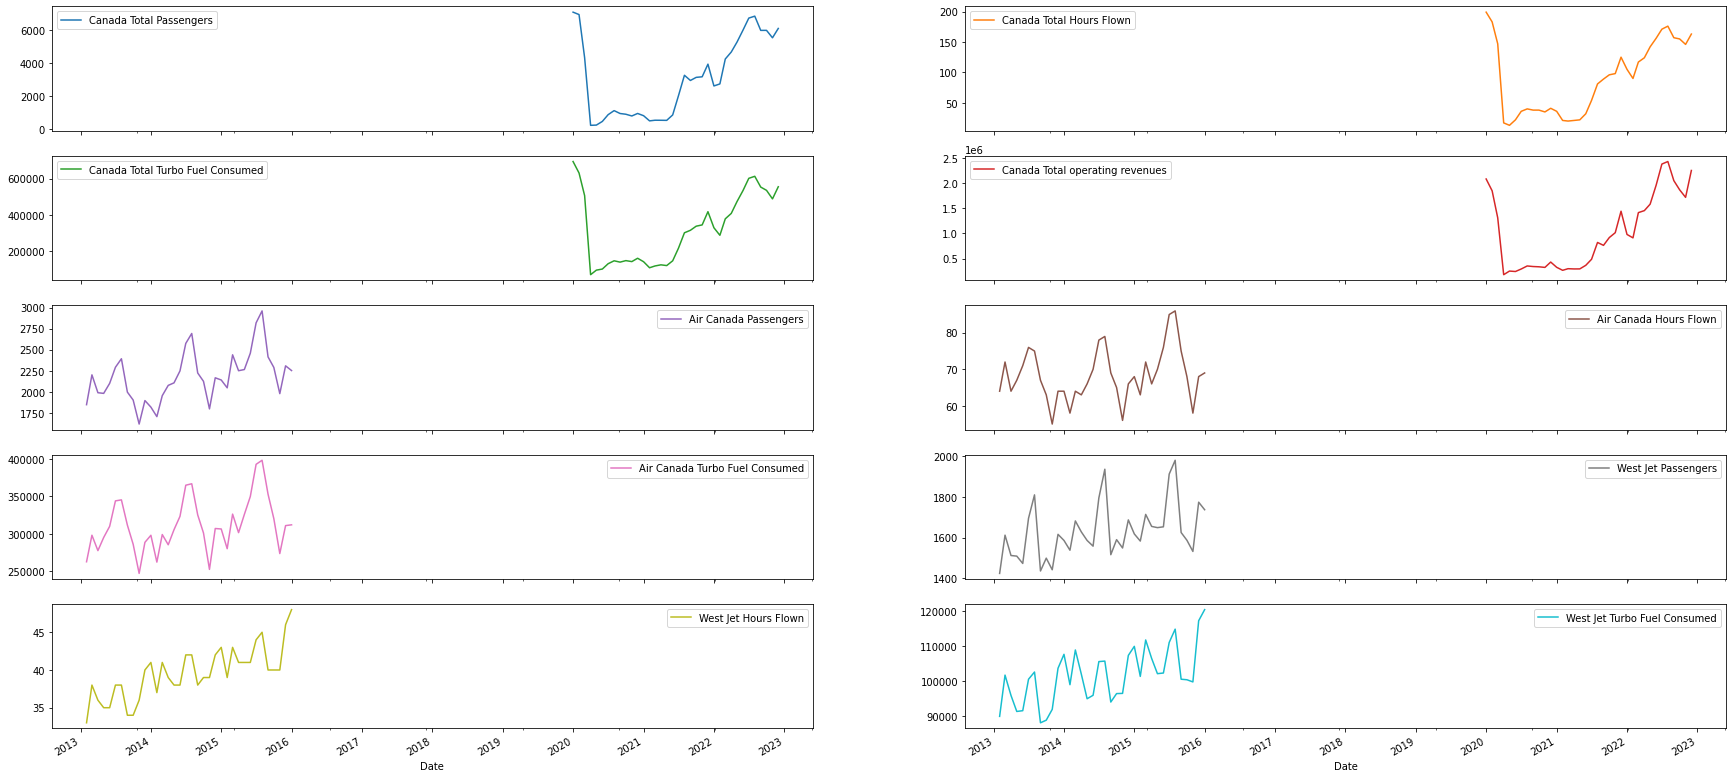

In [60]:
df.plot(subplots = True, figsize = (30,30), layout = (10,2))